# Processing mctal files with ALEPH

Import ALEPH!

In [1]:
import aleph

Mctal is available in file `"fluxes.m"`

In [2]:
file = "fluxes.m"

In [3]:
out = aleph.MctalTally.from_file(file)

### What do I get as an output when running `aleph.MctalTally.from_file`?

A python dictionary with meshtally numbers as keys.

In [4]:
out

{4: <aleph.mctal.MctalTally at 0x1ccd7501f48>,
 6: <aleph.mctal.MctalTally at 0x1ccceaeb748>}

In [5]:
out[4]

### But where are the data?

They are accessible in attribute `data` and have a technically 8 dimensions `('f', 'd', 'u', 's', 'm', 'c', 'e', 't')` and two dependent outputs `('vals', 'err')`.
Dimensions and dependent variables are always the same.

In [6]:
out[4].data

,f,d,u,s,m,c,et,t,vals,err
0,10110,0,0,0,0,0,1.00000e-08,0,0.00000e+00,0.00000e+00
1,10110,0,0,0,0,0,1.05078e-08,0,0.00000e+00,0.00000e+00
2,10110,0,0,0,0,0,1.10415e-08,0,0.00000e+00,0.00000e+00
3,10110,0,0,0,0,0,1.16022e-08,0,0.00000e+00,0.00000e+00
4,10110,0,0,0,0,0,1.21914e-08,0,0.00000e+00,0.00000e+00
...,...,...,...,...,...,...,...,...,...,...
11564,50610,0,0,0,0,0,5.17144e+02,0,0.00000e+00,0.00000e+00
11565,50610,0,0,0,0,0,5.43406e+02,0,0.00000e+00,0.00000e+00
11566,50610,0,0,0,0,0,5.71002e+02,0,0.00000e+00,0.00000e+00
11567,50610,0,0,0,0,0,6.00000e+02,0,0.00000e+00,0.00000e+00


In [7]:
out[6].data

,f,d,u,s,m,c,e,t,vals,err
0,10110,0,0,0,0,0,0,0,4.09159e+00,9.00000e-04
1,10210,0,0,0,0,0,0,0,4.03812e+00,1.00000e-03
2,20110,0,0,0,0,0,0,0,3.84105e+00,9.00000e-04
3,20210,0,0,0,0,0,0,0,3.72162e+00,9.00000e-04
4,20310,0,0,0,0,0,0,0,3.61569e+00,9.00000e-04
5,20410,0,0,0,0,0,0,0,3.51993e+00,9.00000e-04
6,30110,0,0,0,0,0,0,0,3.23669e+00,1.00000e-03
7,30210,0,0,0,0,0,0,0,3.00689e+00,1.10000e-03
8,30310,0,0,0,0,0,0,0,3.18960e+00,9.00000e-04
9,30410,0,0,0,0,0,0,0,3.03512e+00,1.00000e-03


These are the f cards used for this problem.

```
+f6      10110 10210
         20110 20210 20310 20410
         30110 30210 30310 30410 30510 30610
         40110 40210 40310 40410 40510
         50110 50210 50310 50410 50510 50610
sd6  1 22r
f4:n     10110 10210
         20110 20210 20310 20410
         30110 30210 30310 30410 30510 30610
         40110 40210 40310 40410 40510
         50110 50210 50310 50410 50510 50610
sd4  1 22r
c group structure for plotting (geometric series)
e4 1e-8 500log 600
```

## Use the options of pandas to analyze the data

### Example 1: plot the power per batch using a histogram plot

Everytime we want to plot something we must import `matploltib`. 

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook

Let's normalize everything to the power of the first batch.

In [9]:
power_1st_batch = out[6].data.iloc[0].vals

In [10]:
df = out[6].data.copy()
df["normalized power"] = df["vals"] / power_1st_batch
df

INFO:  NumExpr defaulting to 4 threads.


,f,d,u,s,m,c,e,t,vals,err,normalized power
0,10110,0,0,0,0,0,0,0,4.09159e+00,9.00000e-04,1.00000e+00
1,10210,0,0,0,0,0,0,0,4.03812e+00,1.00000e-03,9.86932e-01
2,20110,0,0,0,0,0,0,0,3.84105e+00,9.00000e-04,9.38767e-01
3,20210,0,0,0,0,0,0,0,3.72162e+00,9.00000e-04,9.09578e-01
4,20310,0,0,0,0,0,0,0,3.61569e+00,9.00000e-04,8.83688e-01
5,20410,0,0,0,0,0,0,0,3.51993e+00,9.00000e-04,8.60284e-01
6,30110,0,0,0,0,0,0,0,3.23669e+00,1.00000e-03,7.91059e-01
7,30210,0,0,0,0,0,0,0,3.00689e+00,1.10000e-03,7.34895e-01
8,30310,0,0,0,0,0,0,0,3.18960e+00,9.00000e-04,7.79550e-01
9,30410,0,0,0,0,0,0,0,3.03512e+00,1.00000e-03,7.41795e-01


<IPython.core.display.Javascript object>


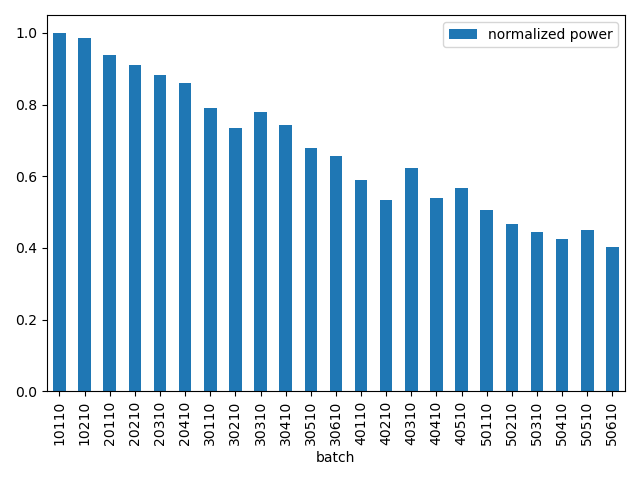

In [11]:
fig, ax = plt.subplots()

df.plot(kind="bar", x="f", y="normalized power", ax=ax)

ax.set_xlabel("batch")
plt.tight_layout();

### Example 2: for each batch plot the spectrum divided in 3 groups (thermal, epithermal, fast)

In [12]:
df = out[4].data[out[4].data.et != "total"]

In [13]:
def func(x):
    if x < 1e-6:
        return "thermal"
    elif x >= 1:
        return "fast"
    else:
        return "epithermal"

groups = df.loc[:, "et"].apply(func).rename("energy groups")
df = df.merge(groups, left_index=True, right_index=True)
df

,f,d,u,s,m,c,et,t,vals,err,energy groups
0,10110,0,0,0,0,0,1.00000e-08,0,0.00000e+00,0.00000e+00,thermal
1,10110,0,0,0,0,0,1.05078e-08,0,0.00000e+00,0.00000e+00,thermal
2,10110,0,0,0,0,0,1.10415e-08,0,0.00000e+00,0.00000e+00,thermal
3,10110,0,0,0,0,0,1.16022e-08,0,0.00000e+00,0.00000e+00,thermal
4,10110,0,0,0,0,0,1.21914e-08,0,0.00000e+00,0.00000e+00,thermal
...,...,...,...,...,...,...,...,...,...,...,...
11563,50610,0,0,0,0,0,4.92151e+02,0,0.00000e+00,0.00000e+00,fast
11564,50610,0,0,0,0,0,5.17144e+02,0,0.00000e+00,0.00000e+00,fast
11565,50610,0,0,0,0,0,5.43406e+02,0,0.00000e+00,0.00000e+00,fast
11566,50610,0,0,0,0,0,5.71002e+02,0,0.00000e+00,0.00000e+00,fast


In [14]:
tab = df[["f", "energy groups", "vals"]].pivot_table(index="f", columns="energy groups", values="vals")
tab[["thermal", "epithermal", "fast"]]

energy groups,thermal,epithermal,fast
f,,,
10110,5.40929e-06,2.48817e-02,7.35308e-03
10210,5.19610e-06,2.46005e-02,7.26375e-03
20110,6.69845e-06,2.30850e-02,7.07074e-03
20210,5.70593e-06,2.24589e-02,6.80875e-03
20310,7.52913e-06,2.17116e-02,6.64727e-03
20410,6.23113e-06,2.12063e-02,6.47754e-03
30110,1.02979e-05,1.93691e-02,5.92717e-03
30210,7.22307e-06,1.81269e-02,5.36997e-03
30310,1.14173e-05,1.90612e-02,5.87253e-03


In [15]:
tab = tab.divide(tab.sum(axis=1), axis=0)

<IPython.core.display.Javascript object>


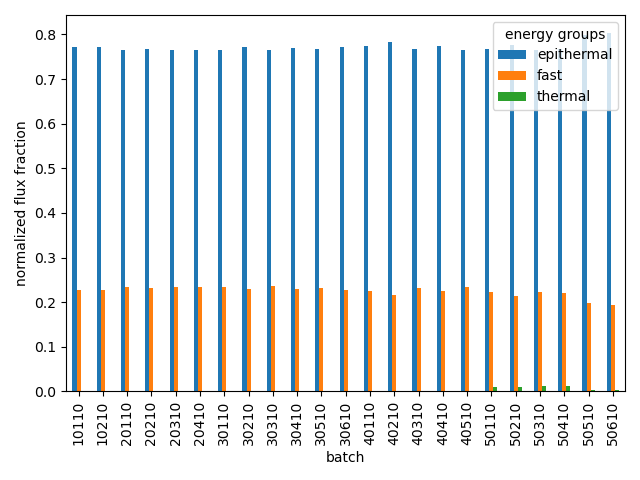

In [16]:
fig, ax = plt.subplots()

tab.plot(kind="bar", ax=ax)

ax.set_xlabel("batch")
ax.set_ylabel("normalized flux fraction")
plt.tight_layout();